<a href="https://colab.research.google.com/github/surajjorwar/Machine-Learning-Tasks-/blob/main/anomaly_detection_using_dbscan_and_IsolationForest_video_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as m
from sklearn.datasets import make_circles



In [198]:
df = pd.read_csv('/content/drive/MyDrive/andrew ng /height and weight/weight-height.csv')

In [199]:
df.drop(columns = ('Gender'),inplace = True )

In [200]:
df.head(4)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


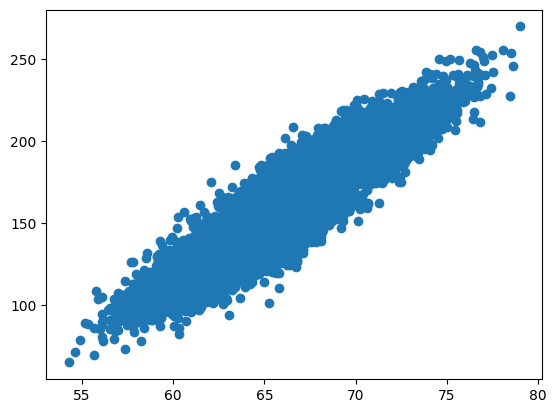

In [202]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [203]:
from sklearn.ensemble import IsolationForest

In [204]:
clf = IsolationForest(contamination=0.1)
clf.fit(df)
prediction = clf.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [205]:
prediction

array([-1,  1, -1, ...,  1,  1,  1])

In [206]:
X = df.values

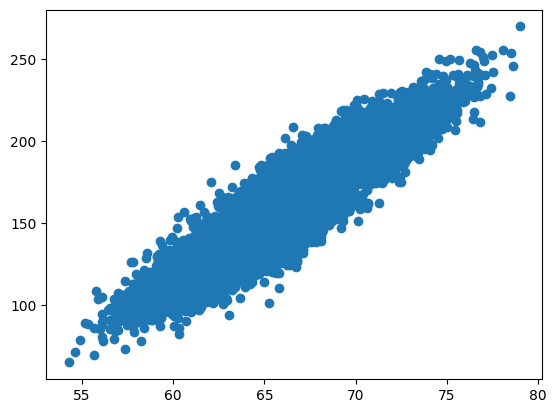

In [207]:
index =np.where(prediction < 0)
plt.scatter(df.iloc[:,0],df.iloc[:,1])

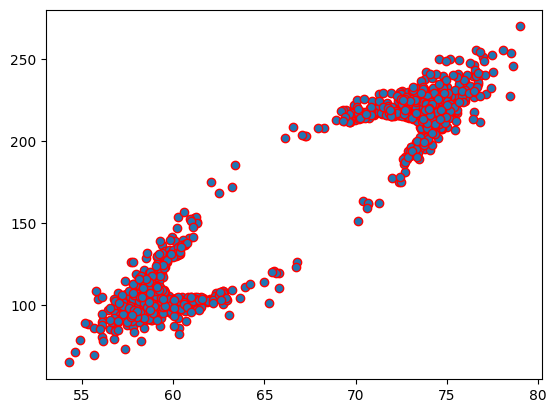

In [208]:
plt.scatter(X[index,0],X[index,1],edgecolors="r")

# DBSCAN Clustering

Creating data set for DBSCAN

In [209]:
x,y = make_circles(n_samples=900,factor =0.3,noise = 0.1)

In [210]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.10)
dbscan.fit_predict(x)

array([-1, -1,  0,  7,  1,  0,  2,  1,  1,  2,  3,  1,  1,  1,  1,  1,  1,
        1,  0,  4,  1,  5, -1,  5,  1,  3,  3,  6,  3,  1,  1,  6,  0,  1,
        3,  7,  1,  1,  0,  6,  1,  1,  3,  1,  1,  6,  0, -1,  1,  0,  1,
        1,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  3,  7, -1,  4,
        0,  1,  1,  1,  1,  6,  9,  0,  3,  0,  7,  1,  0,  5,  1,  7,  1,
        1,  0,  1,  1,  1,  1,  1,  3,  1, -1,  1,  1,  5,  1,  1,  3,  1,
        3,  0,  5,  7,  1,  1,  0,  0,  7,  1,  1,  0,  1,  1,  3,  1,  5,
        0,  3, -1,  1, -1,  1,  1,  5,  0,  1,  3,  0,  1,  0,  1,  1,  1,
        3,  1,  2,  7,  3,  1,  1,  7, -1,  1,  3,  2,  1,  1,  1,  3,  3,
        1,  3,  2, -1,  3,  1, -1,  1,  1,  1,  1, -1,  1,  3,  5,  1,  3,
        1,  0,  2,  5,  3,  1,  3,  1,  1,  1,  1,  7,  1,  5,  0,  1, -1,
        5,  2,  1,  3,  1,  1,  5,  5,  0,  1,  1,  2,  1,  1,  0, -1,  1,
        1,  1, -1,  3,  1,  1,  1,  1,  6,  1,  3,  1,  5,  1,  1,  1,  2,
        3,  1,  2,  5,  1

In [211]:
dbscan.labels_

array([-1, -1,  0,  7,  1,  0,  2,  1,  1,  2,  3,  1,  1,  1,  1,  1,  1,
        1,  0,  4,  1,  5, -1,  5,  1,  3,  3,  6,  3,  1,  1,  6,  0,  1,
        3,  7,  1,  1,  0,  6,  1,  1,  3,  1,  1,  6,  0, -1,  1,  0,  1,
        1,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  3,  7, -1,  4,
        0,  1,  1,  1,  1,  6,  9,  0,  3,  0,  7,  1,  0,  5,  1,  7,  1,
        1,  0,  1,  1,  1,  1,  1,  3,  1, -1,  1,  1,  5,  1,  1,  3,  1,
        3,  0,  5,  7,  1,  1,  0,  0,  7,  1,  1,  0,  1,  1,  3,  1,  5,
        0,  3, -1,  1, -1,  1,  1,  5,  0,  1,  3,  0,  1,  0,  1,  1,  1,
        3,  1,  2,  7,  3,  1,  1,  7, -1,  1,  3,  2,  1,  1,  1,  3,  3,
        1,  3,  2, -1,  3,  1, -1,  1,  1,  1,  1, -1,  1,  3,  5,  1,  3,
        1,  0,  2,  5,  3,  1,  3,  1,  1,  1,  1,  7,  1,  5,  0,  1, -1,
        5,  2,  1,  3,  1,  1,  5,  5,  0,  1,  1,  2,  1,  1,  0, -1,  1,
        1,  1, -1,  3,  1,  1,  1,  1,  6,  1,  3,  1,  5,  1,  1,  1,  2,
        3,  1,  2,  5,  1

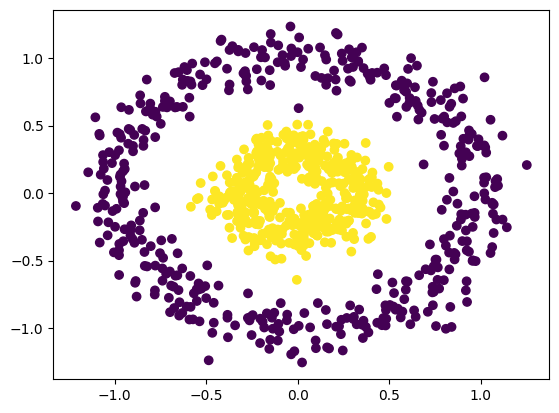

In [212]:
plt.scatter(x[:,0],x[:,1],c=y)

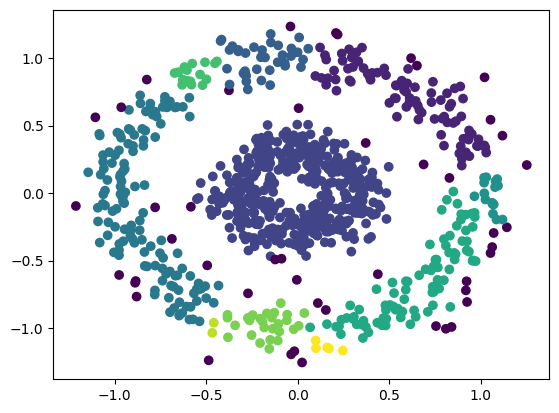

In [213]:
plt.scatter(x[:,0],x[:,1],c = dbscan.labels_)

# here voilet colour is the colour of outlier which is detected by dbscan